In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
# Read in data
df = pd.read_csv('Train.csv')
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [3]:
df.shape

(30557, 82)

In [4]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [5]:
# check for duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle


In [6]:
# Check for number of unique elements under each category
df.apply('nunique')

Place_ID X Date                 30557
Date                               94
Place_ID                          340
target                            375
target_min                        269
                                ...  
L3_CH4_aerosol_optical_depth     2874
L3_CH4_sensor_azimuth_angle      2874
L3_CH4_sensor_zenith_angle       2874
L3_CH4_solar_azimuth_angle       2874
L3_CH4_solar_zenith_angle        2874
Length: 82, dtype: int64

In [7]:
# Check for zeros in data
df.isin([0]).sum().sort_values(ascending=False).head(10)

L3_CH4_solar_zenith_angle                        2915
L3_CH4_sensor_zenith_angle                       2915
L3_CH4_sensor_azimuth_angle                      2915
L3_CH4_aerosol_optical_depth                     2915
L3_CH4_aerosol_height                            2915
L3_CH4_CH4_column_volume_mixing_ratio_dry_air    2915
L3_CH4_solar_azimuth_angle                       2915
L3_NO2_cloud_fraction                            2897
L3_NO2_sensor_zenith_angle                       2611
L3_NO2_tropopause_pressure                       2611
dtype: int64

In [8]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_CH4_solar_zenith_angle                          24765
L3_CH4_solar_azimuth_angle                         24765
L3_CH4_sensor_zenith_angle                         24765
L3_CH4_sensor_azimuth_angle                        24765
L3_CH4_aerosol_optical_depth                       24765
L3_CH4_aerosol_height                              24765
L3_CH4_CH4_column_volume_mixing_ratio_dry_air      24765
L3_NO2_tropospheric_NO2_column_number_density       8669
L3_HCHO_tropospheric_HCHO_column_number_density     7425
L3_HCHO_solar_zenith_angle                          7425
dtype: int64


In [9]:
#get rid of all CH4 columns because they don't have that much info - a lot of zeros and NaNs
df = df.drop([ 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle'], axis=1)

In [10]:
# Recheck number of zeros and NaNs
print(df.isin([0]).sum().sort_values(ascending=False).head(10))
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_NO2_cloud_fraction                             2897
L3_NO2_tropopause_pressure                        2611
L3_NO2_sensor_azimuth_angle                       2611
L3_NO2_tropospheric_NO2_column_number_density     2611
L3_NO2_stratospheric_NO2_column_number_density    2611
L3_NO2_solar_zenith_angle                         2611
L3_NO2_solar_azimuth_angle                        2611
L3_NO2_sensor_zenith_angle                        2611
L3_NO2_sensor_altitude                            2611
L3_NO2_absorbing_aerosol_index                    2611
dtype: int64
L3_NO2_tropospheric_NO2_column_number_density          8669
L3_HCHO_tropospheric_HCHO_column_number_density        7425
L3_HCHO_tropospheric_HCHO_column_number_density_amf    7425
L3_HCHO_solar_zenith_angle                             7425
L3_HCHO_solar_azimuth_angle                            7425
L3_HCHO_sensor_zenith_angle                            7425
L3_HCHO_sensor_azimuth_angle                           7425
L3_HCHO_cloud_fra

I will now investigate whether or not the zeros in the data are due to a lack of information or if it actually makes sense for the data to have values of 0. Taking a look at some of the observations with 0 value in L3_NO2_cloud_fraction (the column with the most 0s): 

In [11]:
display(df[df.L3_NO2_cloud_fraction == 0].head(10))

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
86,010Q650 X 2020-03-28,2020-03-28,010Q650,54.0,27.0,76.0,1978.48,83,19.700001,73.000000,0.008420,16.191858,2.627944,-0.196741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113733,231.170874,0.271540,-4.240685,57.759226,-39.590673,48.292916,0.020893,1352.145788,1396.235912,839787.115499,75.284695,51.401343,-27.242068,42.298248,0.000066,0.269066,-4.239497,57.758086,-39.590454,48.290744,0.000143,0.519249,4889.302151,57160.511136,0.275129,10.183423,5889.302189,50234.682138,-4.240685,57.759226,-39.590673,48.292916,0.250742,-0.835711,840756.717048,-4.240685,57.759226,-39.590673,48.292916,0.000137,0.310367,-0.000029,-1.251251,0.271540,-4.240685,57.759226,-39.590673,48.292916
87,010Q650 X 2020-03-29,2020-03-29,010Q650,50.0,31.0,67.0,977.09,92,20.400000,57.200001,0.006760,16.571649,1.681426,0.674067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113769,230.689257,0.128049,-13.681473,59.674360,-35.610490,47.173387,0.019910,959.620819,100.895999,839862.618281,31.127966,62.309884,-28.063348,44.194501,0.000063,0.128049,-13.681473,59.674360,-35.610490,47.173387,0.000164,0.706256,1374.645718,87108.965295,0.125783,4.656796,1876.521387,82731.839780,-13.681473,59.674360,-35.610490,47.173387,0.220840,-0.952558,840483.641615,-13.681473,59.674360,-35.610490,47.173387,-0.000305,0.438089,-0.000129,-1.371859,0.128049,-13.681473,59.674360,-35.610490,47.173387
88,010Q650 X 2020-03-30,2020-03-30,010Q650,29.0,19.0,55.0,1106.75,95,11.200000,33.200001,0.004140,17.455774,1.201460,3.086216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111579,231.350736,0.082988,-104.557370,37.290817,-45.749798,50.692152,0.021679,609.429284,525.870655,841101.387949,-102.571374,37.372516,-45.764283,50.700694,0.000014,0.082988,-104.557370,37.290817,-45.749798,50.692152,0.000103,0.546205,2707.481437,73948.463956,0.083122,4.455179,3707.481433,65404.090844,-104.557370,37.290817,-45.749798,50.692152,0.234848,-1.033

It looks like there is a consistent theme for the data above: the NO2 data is all 0s or missing entirely. Doing a little research into what each of the terms mean, columns such as the one representing tropospheric pressure cannot be zero and it is highly unlikely for column density to be 0 (pretty much impossible). I think that zeros are therefore representative of missing information, and will now replace the 0s with NaNs to prevent misreading information. 

In [12]:
df.replace(0, np.nan, inplace=True)
df.isin([0]).sum().sort_values(ascending=False)

L3_SO2_solar_zenith_angle       0
L3_NO2_sensor_altitude          0
L3_NO2_sensor_zenith_angle      0
L3_NO2_solar_azimuth_angle      0
L3_NO2_solar_zenith_angle       0
                               ..
L3_CLOUD_cloud_base_pressure    0
L3_CLOUD_cloud_fraction         0
L3_CLOUD_cloud_optical_depth    0
L3_CLOUD_cloud_top_height       0
Place_ID X Date                 0
Length: 75, dtype: int64

In [13]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

L3_NO2_tropospheric_NO2_column_number_density          11280
L3_HCHO_cloud_fraction                                  8773
L3_SO2_cloud_fraction                                   8563
L3_HCHO_tropospheric_HCHO_column_number_density         7755
L3_HCHO_tropospheric_HCHO_column_number_density_amf     7755
L3_HCHO_solar_zenith_angle                              7755
L3_HCHO_solar_azimuth_angle                             7755
L3_HCHO_sensor_zenith_angle                             7755
L3_HCHO_sensor_azimuth_angle                            7755
L3_HCHO_HCHO_slant_column_number_density                7755
dtype: int64


In [14]:
# Find out how much data there is that do not have null values
df.dropna(how='any',inplace= True)
df.shape

(16383, 75)

After dropping null values, the number of observations dropped from 30557 to 16311 (a little over 50%). 

It appears that the information in the Place_ID X Date column is represented by the Date and Place_ID columns, thus we can drop this column.

In [15]:
df = df.drop(['Place_ID X Date'], axis=1)

In [16]:
# Check datatypes of each row
df.dtypes

Date                            object
Place_ID                        object
target                         float64
target_min                     float64
target_max                     float64
                                ...   
L3_SO2_cloud_fraction          float64
L3_SO2_sensor_azimuth_angle    float64
L3_SO2_sensor_zenith_angle     float64
L3_SO2_solar_azimuth_angle     float64
L3_SO2_solar_zenith_angle      float64
Length: 74, dtype: object

In [17]:
# The datatype of date column is currently object. Converting to datetime:
df['Date'] = df['Date'].astype('datetime64')

Since there are too many columns to check the datatypes of, I will check to see if there are any categorical variables that need to be converted into numerical variables that can be used during modelling.

In [18]:
df.select_dtypes(exclude=['float64'])

,Date,Place_ID,target_count
1,2020-01-03,010Q650,91
2,2020-01-04,010Q650,96
3,2020-01-05,010Q650,96
4,2020-01-06,010Q650,95
5,2020-01-07,010Q650,94
...,...,...,...
30551,2020-03-14,YWSFY6Q,72
30552,2020-03-15,YWSFY6Q,72
30553,2020-03-16,YWSFY6Q,72
30554,2020-03-17,YWSFY6Q,72


Looks like Place_ID is the only relevant column, lets transform it.

In [19]:
codes, uniques = pd.factorize(df['Place_ID'])
df.insert(7, 'Location', codes)
display(df.head())

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,Location,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
1,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,0,14.600000,48.799999,0.008390,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,0,16.400000,33.400002,0.007500,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,0.015904,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000059,7311.869141,0.000007,0.115876,232.233484,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,841319.860448,-103.494458,49.924556,-78.355069,34.308941,0.000027,0.082063,-105.201338,49.839714,-78.342701,34.296977,0.000124,0.910536,275.903991,98118.935248,0.082247,5.755760,508.977723,95671.383578,-105.201338,49.839714,-78.342701,34.296977,0.307463,-1.001241,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,0,6.911948,21.300001,0.003910,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,0.055765,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000060,11205.388333,0.000023,0.141557,230.936229,0.121261,-104.334066,29.181258,-73.896588,30.545446,0.021207,1061.570832,474.821444,841036.192900,-101.955931,29.214970,-73.914571,30.544513,0.000023,0.121261,-104.334066,29.181258,

We keep track of how to convert between the Location and the corresponding Place_ID by exporting this information into an excel file.

In [20]:
id_to_location = df[['Place_ID','Location']]
id_to_location.to_csv("id_to_location.csv", index=False)

In [21]:
# We can now safely drop the Place_ID column
df = df.drop(['Place_ID'], axis=1)

Looking at the data again, it appears as though the data can be broken down into mutually exclusive groups (data about NO2, data about aerosol, etc.) I think it would be useful to explore correlations between the target variable and each group of data.

In [70]:
target_variables = df.loc[:,'target':'target_count']
general = df.loc[:,'Location':'v_component_of_wind_10m_above_ground']
no2 = df.loc[:,'L3_NO2_NO2_column_number_density':'L3_NO2_tropospheric_NO2_column_number_density']
o3 = df.loc[:,'L3_O3_O3_column_number_density':'L3_O3_solar_zenith_angle']
co = df.loc[:,'L3_CO_CO_column_number_density':'L3_CO_solar_zenith_angle']
hcho = df.loc[:,'L3_HCHO_HCHO_slant_column_number_density':'L3_HCHO_tropospheric_HCHO_column_number_density_amf']
cloud = df.loc[:,'L3_CLOUD_cloud_base_height':'L3_CLOUD_surface_albedo']
aer = df.loc[:,'L3_AER_AI_absorbing_aerosol_index':'L3_AER_AI_solar_zenith_angle']
so2 = df.loc[:,'L3_SO2_SO2_column_number_density':'L3_SO2_solar_zenith_angle']
groups = [general, no2, o3, co, hcho, cloud, aer, so2]

In [71]:
from ipywidgets import interact, fixed

In [96]:
#Create our plotting function
def plot_heatmap(df1, df2, num):
    plt.figure(figsize=(20,10))
    temp = pd.concat([df1, df2[num]], axis=1)
    corrmat = temp.corr()
    corr = sns.heatmap(corrmat, cmap='coolwarm', annot=True,vmin=-1, vmax=1)

In [97]:
interact(plot_heatmap, df1=fixed(target_variables), df2=fixed(groups), 
         num=[('general',0),('no2',1),('o3',2),('co',3),('hcho',4),('cloud',5),('aer',6),('so2',7)]);

interactive(children=(Dropdown(description='num', options=(('general', 0), ('no2', 1), ('o3', 2), ('co', 3), (…

### Summary of heatmaps
In all the heatmaps above, I am most interested in the top right and bottom left corners (that is, how the predictors are correlated to each of the target varaiables). I am also looking for correlations between the predictors to ensure collinearity of data. Some observations:

#### General
- The predictor with the strongest correlation to the target variable is the u component of wind 10m above ground (u component direction: East).
- Precipitable water, specific humidity, and temperature are strongly positively intercorrelated. Doing some research, this makes sense because humidity refers to the amount of water vapor in the local atmosphere, while precipitable water is defined as the amount of moisture in a column of the atmosphere. As such, humidity can be understood as a part of the precipitable water measurement. Higher temperatures are conducive to higher levels of humidity and precipitable water (because more water vapor is needed to reach saturation).
    - Maybe only one of these variables are needed. Since temperature is the strongest predictor of the target variable, that is the variable that we'll keep.
    
#### NO2
- The predictor with the strongest correlation to the target variable is the sensor altitude.
- column density, tropospheric column density, and slant column density are strongly positively correlated. Surprisingly, these variables are not strongly linked to stratospheric column density, which suggests to me that the amount of NO2 in the stratosphere is insignificant relative to the amount of NO2 in the troposphere. Since slant column density is the best predictor of the target variable out of the 3 correlated variables, I will drop the other 2 variables.
- The azimuth and zenith angles of the sensor are less correlated to the target variable than the solar azimuth and zenith angles.
    - This, combined with the first observation, tells me that only the altitude of the sensor is important, not the position (ie. the sensor can be positioned anywhere on the plane at a predetermined altitude).
- Cloud fraction and the target variable are inversely correlated, which makes sense because clouds could have ["shielding, albedo, and in-cloud absorption effects on trace gas retrievals"](https://www.researchgate.net/publication/252884476_Impact_of_Effective_Cloud_Fraction_Assumption_on_Tropospheric_NO2_Retrievals)
- The solar zenith angle matters more than the solar azimuth angle and is a relatively strong predictor of the target variable, meaning that the altitude of the sun (and my extension, the strength of the sun), is a key factor.

#### O3

#### HCHO

#### Cloud

#### Aerosol

#### SO2

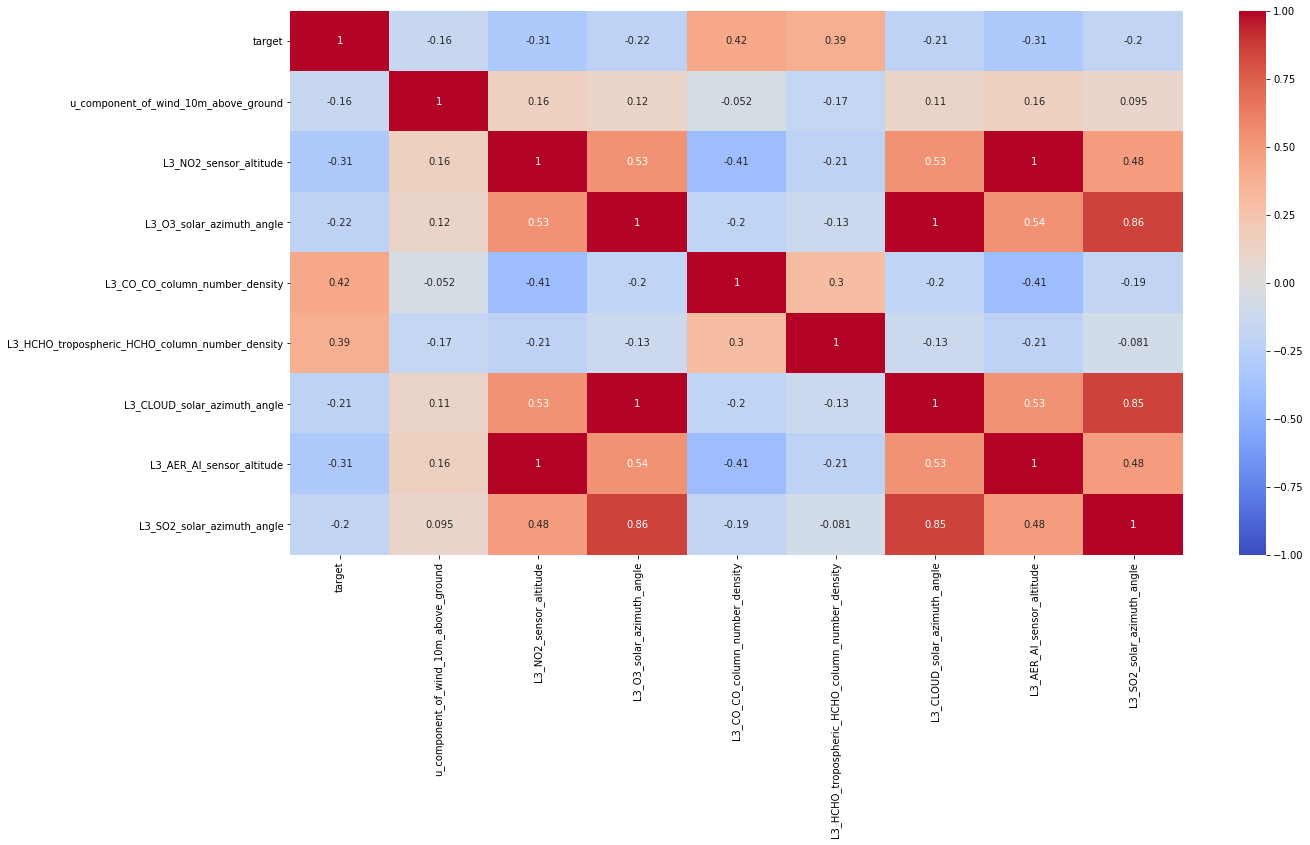

In [99]:
# Compare best predictors of each category
best_predictors = ['target','u_component_of_wind_10m_above_ground','L3_NO2_sensor_altitude','L3_O3_solar_azimuth_angle',
                  'L3_CO_CO_column_number_density','L3_HCHO_tropospheric_HCHO_column_number_density',
                   'L3_CLOUD_solar_azimuth_angle','L3_AER_AI_sensor_altitude','L3_SO2_solar_azimuth_angle']
plt.figure(figsize=(20,10))
best = df[best_predictors]
corrmat = best.corr()
corr = sns.heatmap(corrmat, cmap='coolwarm', annot=True,vmin=-1, vmax=1)
    

From the correlation matrix, we can see that the sensor altitudes across groups are highly correlated (assume that is the case for the rest of the groups, reasonable to assume that all sensors are placed at the same altitude, or that one sensor was used and could measure all the gases). Furtheremore, the solar azimuth angles are also highly correlated. We can assume that the measurements were taken at the same (very similar) time of the day, and thus only one of these measurements is needed. This logic carries over to the solar zenith angle as well as the sensor solar and zenith angles.

In [26]:
df.describe()

,target,target_min,target_max,target_variance,target_count,Location,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
count,16383.000000,16383.00000,16383.000000,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000,16383.000000,16383.000000,16383.000000
mean,65.296863,32.02458,126.152768,8.985654e+03,121.877007,167.696271,14.911322,67.776642,0.006299,10.434718,0.442937,-0.069289,0.000102,0.000191,-1.277031,1.715506e-01,832342.865844,-15.754368,36.762183,-122.055820,47.020717,0.000037,14075.017140,0.000062,0.140228,227.802486,2.449535e-01,-15.898553,36.831256,-121.655399,47.037538,0.036728,1022.002877,1186.227682,832345.365770,-17.386610,36.289367,-126.775210,47.055273,0.000048,1.810454e-01,-17.560234,36.544646,-124.854199,47.058173,0.000093,1.090963,2013.048747,81734.687990,2.463562e-01,8.612266,2696.870592,75627.667492,-15.874067,36.851439,-121.543188,47.037557,0.216022,-1.268465,832347.854512,-15.282990,36.937020,-120.835842,47.014906,0.000114,0.444242,0.000034,-1.953182,1.894281e-01,-17.276292,36.388198,-125.139513,47.045646
std,48.792369,34.66054,107.293980,5.428274e+04,143.776717,97.831444,10.482081,19.108605,0.003985,9.705877,2.622377,2.512540,0.000086,0.000109,0.483440,1.798503e-01,3176.725391,73.14